In [1]:
#!pip install ipywidgets
#!jupyter nbextension enable --py widgetsnbextension
import scipy as sp
import scipy.io
import scipy.stats
import os
import numpy as np
import pandas as pd
import glob
import csv
import random as rand
from tqdm import tnrange, tqdm_notebook
import sys
sys.path.append(os.getcwd()+'\\..')

import cmocean
import matplotlib.patches as patches
from matplotlib import gridspec
from utils import utils
from utils import plotting_utils as pu
from utils import zscores## If exporting figures for adobe illustrator
from utils import plotting_utils as pu
from utils import auc_methods

from collections import Iterable
import matplotlib.pylab as mpl
import random as rand
import colorlover as cl

# from sklearn.metrics import roc_curve, auc
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import label_binarize

%load_ext autoreload
%autoreload 2
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

## If exporting figures for adobe illustrator

In [2]:
mpl.close('all')

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 6}

mpl.rc('font', **font)
mpl.rc('xtick', labelsize=6) 
mpl.rc('ytick', labelsize=6)
mpl.rc('axes', labelsize=6)

mpl.rcParams['pdf.fonttype'] = 42

mpl.rcParams['ps.fonttype'] = 42
size_mult = 0.2

## If plotting for inline visualization

In [3]:
mpl.close('all')

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}

mpl.rc('font', **font)
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14)
mpl.rc('axes', labelsize=14)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
size_mult = 1

In [4]:
data_directory = os.getcwd()
data_directory

'C:\\Users\\efink\\Documents\\Github\\crossmodal\\Figure7'

In [6]:
mpl.close('all')

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}

mpl.rc('font', **font)
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14)
mpl.rc('axes', labelsize=14)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
size_mult = 1

In [7]:
# data_directory = 'C:\\Users\\PC\\documents\\github\\Crossmodal-project\\Data'
bin_size = 0.025
window = [-1, 3]
edges = np.arange(window[0], window[1], bin_size)

In [8]:
log_df, unit_key_df = utils.load_data(data_directory, switch=True)
# log_df = utils.filt_motion_trials(log_df, data_directory, fn = 'trialsToExclude3')
unit_key_df = utils.calc_unit_stats(unit_key_df, log_df, bin_size,)
log_df['spike_counts(stim_aligned)'] = log_df[
    'spike_times(stim_aligned)'].apply(lambda x: np.histogram(x,edges)[0]/bin_size)

HBox(children=(IntProgress(value=0, max=375), HTML(value='')))

In [9]:

conds = ['Touch Stim Lick Right', 'Touch Stim Lick Left', 'Touch Stim No Lick', 
         'Visual Stim Lick Right','Visual Stim Lick Left', 'Visual Stim No Lick']
unit_key_df = zscores.calc_z_scores(log_df, unit_key_df, bin_size, window, conds = conds)
unit_key_df = unit_key_df.sort_values(['activation_resp_touch'], ascending = False)


HBox(children=(IntProgress(value=0, max=375), HTML(value='')))

In [10]:
columns = ['Touch Stim Lick Right(z_score)', 'Touch Stim Lick Left(z_score)', 'Touch Stim No Lick(z_score)', 
         'Visual Stim Lick Right(z_score)','Visual Stim Lick Left(z_score)', 'Visual Stim No Lick(z_score)']
np.where(unit_key_df[columns].applymap(lambda x: any(np.isnan(x))))[0]

array([], dtype=int64)

In [11]:
unit_key_df = unit_key_df.drop([70, 71, 72, 73, 74, 75, 76])

(-0.3, 1)

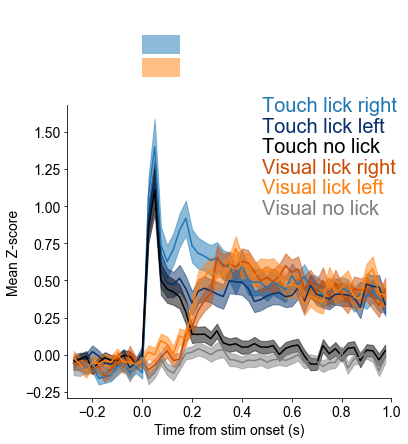

In [12]:
mpl.close('all')

window = [-0.3,1]
sub_map = unit_key_df
colors = cmocean.cm.thermal
columns = ['Touch Stim Lick Right(z_score)', 'Touch Stim Lick Left(z_score)', 'Touch Stim No Lick(z_score)', 
         'Visual Stim Lick Right(z_score)','Visual Stim Lick Left(z_score)', 'Visual Stim No Lick(z_score)']

colors = [ 'C0','#08306b', 'k', '#cc4c02', 'C1', 'C7' ]
titles = ['Touch lick right', 'Touch lick left', 'Touch no lick', 
          'Visual lick right', 'Visual lick left', 'Visual no lick']
data = {}
xvals = np.arange(window[0], window[1],bin_size)
xbins = ((xvals+1)/0.025).astype(int)
for z_map in columns:
    data[z_map] = pd.DataFrame(np.stack(sub_map[z_map].dropna().as_matrix()))
    
fig8a_1 = mpl.figure(figsize = (6*size_mult,7*size_mult))

gs1 = gridspec.GridSpec(1,1)
gs2 = gridspec.GridSpec(1,1)
gs1.update(bottom=0.1, top=0.68, left = 0.15, right = 0.9)
gs2.update(bottom = 0.69, top=0.87, left = 0.15, right = 0.9)

ax1 = mpl.subplot(gs1[0, 0])
ax2 = mpl.subplot(gs2[0, 0], sharex =ax1)
ax2.axis('off')
ax2.add_patch(patches.Rectangle((0,2.4), 0.15, 1, facecolor = 'C0', alpha = .5))
ax2.add_patch(patches.Rectangle((0,1.2), 0.15, 1, facecolor = 'C1', alpha = .5))
ax2.set_ylim(0,4.7)

m_psth = []
sem_psth = []

for col in columns:
    m_psth.append(data[col].mean(axis = 0)[xbins[:-1]])
    sem_psth.append(scipy.stats.sem(data[col], axis = 0)[xbins[:-1]])

for col in range(6):
    ax1.plot(xvals[1:],m_psth[col], colors[col])
    ax1.fill_between(xvals[1:], m_psth[col]-sem_psth[col], m_psth[col]+sem_psth[col],
                     alpha=0.5,color = colors[col])
    ax1.text(.6, .98-0.07*col, titles[col] , size=20, transform=ax1.transAxes, color = colors[col])

ax1.set_xlabel('Time from stim onset (s)')
ax1.set_ylabel('Mean Z-score')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlim(window)

In [13]:
fig8a_1.savefig('fig8a_1.pdf', format='pdf', dpi=900)

# Calculate AUCs for both lick directions/both stims

In [14]:
# # all_auc_scores = []
# # all_confidence_upper_scores = []
# # all_confidence_lower_scores = []
# # for unit_num in tnrange(unit_key_df.index.shape[0]):
# #     all_auc_scores.append(auc_scores)
# #     all_confidence_upper_scores.append(unit_conf_upper)
# #     all_confidence_lower_scores.append(unit_conf_lower)

# def trial_auc(data_log, unit_key, modality, contingency, unit_num):
#     # for i in tnrange(len(unit_key_df.index)):
#     edges = np.arange(-1,3, 0.025)

#     unit_id_df = unit_key_df[['mouse_name', 'date', 'cluster_name']]
#     unit = pd.DataFrame(unit_id_df.loc[unit_id_df.index[unit_num]]).T
    
#     unit_rows = log_df.merge(unit, on=['mouse_name', 'date', 'cluster_name'], how = 'inner')
    
#     if (modality == 'tactile') & (contingency == 'normal'):
#         tt = 'Stim_Som_NoCue'
#         side = 1
#     elif (modality == 'tactile') & (contingency == 'switch'):
#         tt = 'Stim_Som_NoCue'
#         side = 2
#     elif (modality == 'visual') & (contingency == 'normal'):
#         tt = 'Stim_Vis_NoCue'
#         side = 2
#     elif (modality == 'visual') & (contingency == 'switch'):
#         tt = 'Stim_Vis_NoCue'
#         side = 1
        
          
#     s_l = (unit_rows['trial_type'].str.contains(tt)) & (unit_rows['response'] == side)
#     s_nl = (unit_rows['trial_type'].str.contains(tt)) & (unit_rows['response'] == 0)

#     bin_means_all = []
#     spike_counts_df = unit_rows[['mouse_name', 'date', 'cluster_name', 'trial_num', 
#                                  'spike_times(stim_aligned)', 'spike_counts(stim_aligned)']].copy()
# #     spike_counts_df['spike_counts(stim_aligned)'] = spike_counts_df[
# #         'spike_times(stim_aligned)'].apply(lambda y: np.histogram(y, edges)[0])

#     spike_counts_df['labels'] = np.nan

#     spike_counts_df.loc[s_l, 'labels'] = 'stim_lick'
#     spike_counts_df.loc[s_nl, 'labels'] = 'stim_nolick'
   
#     comparison_ind = (s_l| s_nl)
#     label1 = 'stim_lick'
#     label2 = 'stim_no_lick'
    
        

#     y = label_binarize(spike_counts_df.loc[comparison_ind, 'labels'], classes=[label2, label1])
#     spike_counts_2d = np.stack(spike_counts_df.loc[comparison_ind, 'spike_counts(stim_aligned)'].as_matrix())
    

#     auc_scores = np.zeros([1,spike_counts_2d.shape[1]])
#     unit_conf_upper = np.zeros([1,spike_counts_2d.shape[1]])
#     unit_conf_lower = np.zeros([1,spike_counts_2d.shape[1]])
#     for bin in range(spike_counts_2d.shape[1]):
#         if len(np.unique(y)) < 2:
#             auc_scores[0][bin] = np.nan
#             unit_conf_lower[0][bin] =np.nan
#             unit_conf_upper[0][bin] = np.nan
#         else:
#             auc_scores[0][bin] = roc_auc_score(y,spike_counts_2d[:, bin])

#             rng_seed = 42  # control reproducibility
#             rng = np.random.RandomState(rng_seed)

#             bootstrapped_scores = []
#             for boot_num in range(1000):
#                 indices = rng.randint(0, len(y) - 1, len(y))
#                 if len(np.unique(y[indices])) < 2:
#                     # need at least one positive and one negative sample for ROC AUC
#                     # to be defined: reject the sample
#                     continue
#                 bootstrapped_scores.append(roc_auc_score(y[indices],spike_counts_2d[indices, bin]))
#             sorted_scores = np.array(bootstrapped_scores)
#             sorted_scores.sort()
#             unit_conf_lower[0][bin] = sorted_scores[int(0.025 * len(sorted_scores))]
#             unit_conf_upper[0][bin] = sorted_scores[int(0.975 * len(sorted_scores))]
        
#     return auc_scores , unit_conf_lower, unit_conf_upper
        


In [15]:
# tactile_right_aucs_CI = [trial_auc(log_df, unit_key_df, 'tactile', 'normal', x) for x in tnrange(0,unit_key_df.shape[0],1)]
# tactile_right_aucs_CI = np.squeeze(np.array(tactile_right_aucs_CI))

# tactile_right_aucs = pd.DataFrame(tactile_right_aucs_CI[:,0])
# tactile_right_CI_lower = pd.DataFrame(tactile_right_aucs_CI[:,1])
# tactile_right_CI_upper = pd.DataFrame(tactile_right_aucs_CI[:,2])

# tactile_right_aucs.to_hdf('aucs_right_tactile.h5', 'table')
# tactile_right_CI_lower.to_hdf('auc_confidence_upper_tactile_right.h5', 'table')
# tactile_right_CI_upper.to_hdf('auc_confidence_lower_tactile_right.h5', 'table')


# # #############
# tactile_left_aucs_CI = [trial_auc(log_df, unit_key_df, 'tactile', 'switch', x) for x in tnrange(0,unit_key_df.shape[0],1)]
# tactile_left_aucs_CI = np.squeeze(np.array(tactile_left_aucs_CI))

# tactile_left_aucs = pd.DataFrame(tactile_left_aucs_CI[:,0])
# tactile_left_CI_lower = pd.DataFrame(tactile_left_aucs_CI[:,1])
# tactile_left_CI_upper = pd.DataFrame(tactile_left_aucs_CI[:,2])

# tactile_left_aucs.to_hdf('aucs_left_tactile.h5', 'table')
# tactile_left_CI_lower.to_hdf('auc_confidence_upper_tactile_left.h5', 'table')
# tactile_left_CI_upper.to_hdf('auc_confidence_lower_tactile_left.h5', 'table')

# ################
# visual_right_aucs_CI = [trial_auc(log_df, unit_key_df, 'visual', 'switch', x) for x in tnrange(0,unit_key_df.shape[0],1)]
# visual_right_aucs_CI = np.squeeze(np.array(visual_right_aucs_CI))

# visual_right_aucs = pd.DataFrame(visual_right_aucs_CI[:,0])
# visual_right_CI_lower = pd.DataFrame(visual_right_aucs_CI[:,1])
# visual_right_CI_upper = pd.DataFrame(visual_right_aucs_CI[:,2])

# visual_right_aucs.to_hdf('aucs_right_visual.h5', 'table')
# visual_right_CI_lower.to_hdf('auc_confidence_upper_visual_right.h5', 'table')
# visual_right_CI_upper.to_hdf('auc_confidence_lower_visual_right.h5', 'table')

# #####################
# visual_left_aucs_CI = [trial_auc(log_df, unit_key_df, 'visual', 'normal', x) for x in tnrange(0,unit_key_df.shape[0],1)]
# visual_left_aucs_CI = np.squeeze(np.array(visual_left_aucs_CI))

# visual_left_aucs = pd.DataFrame(visual_left_aucs_CI[:,0])
# visual_left_CI_lower = pd.DataFrame(visual_left_aucs_CI[:,1])
# visual_left_CI_upper = pd.DataFrame(visual_left_aucs_CI[:,2])

# visual_left_aucs.to_hdf('aucs_left_visual.h5', 'table')
# visual_left_CI_lower.to_hdf('auc_confidence_upper_visual_left.h5', 'table')
# visual_left_CI_upper.to_hdf('auc_confidence_lower_visual_left.h5', 'table')

# Load AUCs

In [16]:
tactile_LR_aucs = pd.read_hdf('aucs_right_tactile2.h5', 'table').loc[np.array(unit_key_df.index)]
tactile_LR_upper = pd.read_hdf('auc_confidence_upper_tactile_right2.h5','table').loc[np.array(unit_key_df.index)]
tactile_LR_lower = pd.read_hdf('auc_confidence_lower_tactile_right2.h5','table').loc[np.array(unit_key_df.index)]

visual_LL_aucs = pd.read_hdf('aucs_left_visual2.h5','table').loc[np.array(unit_key_df.index)]
visual_LL_upper = pd.read_hdf('auc_confidence_upper_visual_left2.h5','table').loc[np.array(unit_key_df.index)]
visual_LL_lower = pd.read_hdf('auc_confidence_lower_visual_left2.h5','table').loc[np.array(unit_key_df.index)]

tactile_LL_aucs = pd.read_hdf('aucs_left_tactile2.h5','table').loc[np.array(unit_key_df.index)]
tactile_LL_upper = pd.read_hdf('auc_confidence_upper_tactile_left2.h5','table').loc[np.array(unit_key_df.index)]
tactile_LL_lower = pd.read_hdf('auc_confidence_lower_tactile_left2.h5','table').loc[np.array(unit_key_df.index)]

visual_LR_aucs = pd.read_hdf('aucs_right_visual2.h5','table').loc[np.array(unit_key_df.index)]
visual_LR_upper = pd.read_hdf('auc_confidence_upper_visual_right2.h5', 'table').loc[np.array(unit_key_df.index)]
visual_LR_lower = pd.read_hdf('auc_confidence_lower_visual_right2.h5','table').loc[np.array(unit_key_df.index)]


FileNotFoundError: File aucs_right_tactile2.h5 does not exist

In [21]:
######## used in later figures
mean_auc = (tactile_LR_aucs + visual_LL_aucs + tactile_LL_aucs +visual_LR_aucs)/4
window = np.arange(0 + 1/0.025, 0.75/0.025 + 1/0.025, 1)
mAUC_crop = mean_auc.loc[:, window].mean(axis=1)
unit_key_df['m_resp_auc'] = mAUC_crop

NameError: name 'tactile_LR_aucs' is not defined

In [ ]:
def find_liftoff(upper_CI, lower_CI, window):
    
    raw_AUC = ((upper_CI.fillna(0.5) <= 0.5) & 
                   (lower_CI.fillna(0.5) >= 0.5))*1 #multiplying by 1 changes from bool to 0s and 1s
    smooth_AUC = raw_AUC.apply(lambda y: np.convolve(y, [1,1,1], 'same'), axis = 1)

    all_sig = ((smooth_AUC == 0)*1).apply(lambda y: np.where(y), axis = 1)
    all_sig = all_sig.apply(lambda y: (y[0]-2)*0.025-1 if len(y[0])>0 else [])
    
    all_first_sig = all_sig.apply(lambda y:  y[(y>window[0]) & (y<window[1])] if len(y)!=0 else [])
    all_first_sig = all_first_sig.apply(lambda y:  np.nan if len(y)==0 else np.min(y))
    
    return all_first_sig

In [ ]:
act_resp_window = np.round(([0,.500/bin_size]) + window[0]) -1

##need to do this in two parts otherwise python crashes
act_resp = unit_key_df.loc[:,z_conds].applymap(lambda y: y[int(act_resp_window[0]):int(act_resp_window[1])])
act_resp  = act_resp.applymap(lambda y: np.nanmean(y))
unit_key_df['activation_resp'] = act_resp['Touch Stim Lick Right(z_score)'] + act_resp['Touch Stim Lick Left(z_score)']

In [ ]:
all_first_sig_tac_LR = find_liftoff(tactile_LR_upper, tactile_LR_lower, [0,1])
all_first_sig_tac_LL = find_liftoff(tactile_LL_upper, tactile_LL_lower, [0,1])
all_first_sig_vis_LR = find_liftoff(visual_LR_upper, visual_LR_lower, [0,1])
all_first_sig_vis_LL = find_liftoff(visual_LL_upper, visual_LL_lower, [0,1])

all_first_sig = pd.DataFrame([all_first_sig_tac_LR, all_first_sig_tac_LL, all_first_sig_vis_LR, all_first_sig_vis_LL], 
                            index = ['tac_LR', 'tac_LL', 'vis_LR','vis_LL']).T


any_sig =  (~(all_first_sig.isnull())).any(axis=1).as_matrix()

unit_key_df_onsets = pd.concat((unit_key_df.loc[any_sig,:], all_first_sig.loc[any_sig,:]), axis=1)

# FP_TR = (unit_key_df_onsets['tac_LR']>unit_key_df_onsets['RT_median_TLR'])
# FP_TL = (unit_key_df_onsets['tac_LL']>unit_key_df_onsets['RT_median_TLL'])
# FP_VR = (unit_key_df_onsets['vis_LR']>unit_key_df_onsets['RT_median_VLR'])
# FP_VL = (unit_key_df_onsets['vis_LL']>unit_key_df_onsets['RT_median_VLL'])

# unit_key_df_onsets = unit_key_df_onsets[(~(FP_TR | FP_TL | FP_VR | FP_VL))]

In [ ]:
mpl.close('all')
fig8b_1 = mpl.figure(figsize = (12,8))
ax1 = fig8b_1.add_subplot(2,2,1)
ax2 = fig8b_1.add_subplot(2,2,2)
ax3 = fig8b_1.add_subplot(2,2,3)
ax4 = fig8b_1.add_subplot(2,2,4)
fig8b_1.subplots_adjust(left = 0.1, bottom = 0.15, wspace = 0.3, hspace = 0.4)


axs= [ax1,ax2,ax3,ax4]
colors = [ '#08306b', 'C0', 'C1', '#cc4c02' ]
react_times = ['RT_median_TLL', 'RT_median_TLR','RT_median_VLL','RT_median_VLR']
onset_times = ['tac_LL', 'tac_LR', 'vis_LL','vis_LR']
titles = ['Touch lick left\nlate activity onset', 'Touch lick right\nlate activity onset',
       'Visual lick left\nlate activity onset', 'Visual lick right\nlate activity onset']
for col_num in range(4):
    
    rows = ~(unit_key_df_onsets.loc[:,onset_times[col_num]].isnull()).as_matrix()
   
    
    RT = unit_key_df_onsets.loc[rows,react_times[col_num]].sort_values()
    late_onset = unit_key_df_onsets.loc[rows,onset_times[col_num]][list(RT.index)]
    norm_late_onset = late_onset-RT
    
    for unit in range(RT.shape[0]):
        axs[col_num].add_patch(patches.Rectangle((0, unit), RT.iloc[unit], 1, edgecolor = 'k',
                                                 facecolor =  'k', linewidth = 0.01, alpha=0.2))
        axs[col_num].add_patch(patches.Rectangle((0, unit), late_onset.iloc[unit], 1, edgecolor =  colors[col_num],
                                                 facecolor =  colors[col_num], linewidth = 0.2))
        
    axs[col_num].text(.5, .3, titles[col_num], size=18, transform=axs[col_num].transAxes, color = colors[col_num])
    axs[col_num].text(.5, .15, 'Reaction time', size=18, transform=axs[col_num].transAxes, color = 'C7')
        
    axs[col_num].set_ylabel('Unit')
    axs[col_num].set_xlabel('Time from stim onset (s)')

    axs[col_num].set_ylim(0,unit)
    axs[col_num].set_xlim(0,2.25)
    axs[col_num].spines['right'].set_visible(False)
    axs[col_num].spines['top'].set_visible(False)
    axs[col_num].xaxis.set_ticks_position('bottom')
    axs[col_num].yaxis.set_ticks_position('left')
    
fig8b_1

In [ ]:
# fig8b_1.savefig('fig8b_1.png', format='png', dpi=900)

In [ ]:

mpl.close('all')
fig8b_2 = mpl.figure(figsize = (16,6))
ax1 = fig8b_2.add_subplot(1,2,1)
ax2 = fig8b_2.add_subplot(1,2,2)

titles = ['Touch lick right', 'Touch lick left',
          'Visual lick right', 'Visual lick left']
colors = [ 'C0','#08306b', '#cc4c02', 'C1' ]

react_times = ['RT_median_TLR', 'RT_median_TLL','RT_median_VLR','RT_median_VLL']
onset_times = ['tac_LR', 'tac_LL', 'vis_LR','vis_LL']

num_units = []
for col_num,col in enumerate(['tac_LR', 'tac_LL', 'vis_LR','vis_LL']):
    rows = ~(unit_key_df_onsets.loc[:,col].isnull()).as_matrix()
    values, base = np.histogram(unit_key_df_onsets.loc[rows, col], bins=100)
    cumulative = np.cumsum(values)/len(unit_key_df_onsets.loc[rows, col])
    ax1.plot(base[:-1], cumulative, linewidth = 2.5, color = colors [col_num])
    ax1.set_xlim([0,1])
    num_units.append(unit_key_df_onsets.loc[rows, col].shape[0])
    ax1.text(.4, .3-col_num*.07, titles[col_num], size=20, transform=ax1.transAxes, color = colors[col_num])
    
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.set_ylabel('Cumulative fraction')
ax1.set_xlabel('Onset of late activity (s)')

for col_num,col in enumerate(['RT_median_TLR', 'RT_median_TLL','RT_median_VLR','RT_median_VLL']):

    rows = (~(unit_key_df_onsets.loc[:,onset_times[col_num]].isnull())).as_matrix()
    values, base = np.histogram(unit_key_df_onsets.loc[rows, col], bins=100)
    cumulative = np.cumsum(values)/len(unit_key_df_onsets.loc[rows, col])
    ax2.plot(base[:-1], cumulative, linewidth = 2.5, color = colors [col_num])
    ax2.text(.4, .3-col_num*.07, titles[col_num], size=20, transform=ax2.transAxes, color = colors[col_num])

    
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
ax2.set_ylabel('Cumulative fraction')
ax2.set_xlabel('Reaction time (s)')   
fig8b_2

In [ ]:
fig8b_2.savefig('fig8b_2.pdf', format='pdf', dpi=900)

In [ ]:
mpl.close('all')
unique_sessions = unit_key_df.drop_duplicates(['mouse_name', 'date'])

fig8c_1 = mpl.figure(figsize = (8,5))
ax1 = fig8c_1.add_subplot(111)
fig8c_1.subplots_adjust(left = 0.2, bottom = 0.15, wspace = 0.3, hspace = 0.4)

colors = [ 'C0','#08306b', '#cc4c02', 'C1' ]
titles = ['Touch\nlick right', 'Touch\nlick left', 'Visual\nlick right', 'Visual\nlick left']

bplot = ax1.boxplot(unique_sessions.loc[:, ['RT_median_TLR', 'RT_median_TLL', 'RT_median_VLR', 'RT_median_VLL']].as_matrix(),
            labels = titles, vert = False, patch_artist=True, notch = True)


for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

mpl.setp(bplot['medians'], color='k', linewidth = 3)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel('Reaction time (s)')   
fig8c_1

In [ ]:
fig8c_1.savefig('fig8c_1.pdf', format='pdf', dpi=900)

In [ ]:
subset_dict = {}
size_dict = {}

subset_dict['None'] = 0
size_dict['None'] = 0

categories = np.concatenate([log_df['mouse_name'].unique(), log_df['identified'].unique()])

for cat in categories:
        subset = log_df[log_df['mouse_name'] == cat]
        if subset.size == 0:
            subset = log_df[log_df['identified'] == cat]
            print(cat)
        subset_dict[cat] = subset
        unique_units = subset[['mouse_name', 'date', 'cluster_name']].drop_duplicates()
        size_dict[cat] = len(unique_units)
        #print(unique_units.size)

In [ ]:
import matplotlib.patches as patches
from matplotlib import gridspec
def plot_rasters(rasters, window, bin_size, modality = 'tactile', ylim=None):
    mpl.close('all')
    fig = mpl.figure(figsize=(10, 10))
    first_raster = rasters[0]
    fig.suptitle (rasters[0].iloc[0,0] +', '+ rasters[0].iloc[0, 1] +', '+ rasters[0].iloc[0, 13], size = 22)

    gs1 = gridspec.GridSpec(1,1)
    gs2 = gridspec.GridSpec(2,1)
    gs3 = gridspec.GridSpec(2,1)
    gs1.update(bottom = 0.81, top=0.87, left = 0.2, right = 0.82)
    gs2.update(bottom=0.1, top=0.8, left = 0.2, right = 0.82)
    gs3.update(bottom=0.1, top=0.8, left = 0.83, right = 0.9)
    ax1 = mpl.subplot(gs1[0, 0])
    ax2 = mpl.subplot(gs2[0, 0])
    ax3 = mpl.subplot(gs2[1, 0])
    patch_ax = mpl.subplot(gs3[0, 0], sharey = ax2)

    ax1.axis('off')
    hists = []
    colors = ['C4','C3','C2']

    mpl.sca(ax2)
    trial_type = 0
    trial_total = 0
    for i in range(3):
        ras = rasters[trial_type]
        spike_counts = []
        for trial, spike in enumerate(ras['spike_times(stim_aligned)']):
            spike = spike[(spike>window[0]) & (spike<=window[1])]
            mpl.vlines(spike, trial + trial_total + .5, trial + trial_total + 1.5)
            mpl.vlines(ras.iloc[trial]['first_lick'], trial + trial_total + .5, trial +
                       trial_total + 1.5, color = 'm', linewidth = 5)
           
            spike = spike[(spike>window[0]) & (spike<=window[1])]
            edges = np.arange(window[0], window[1]+bin_size*2, bin_size)
            count, _ = np.histogram(spike,edges)
            spike_counts.append(count)
            
        c1 = 0 + 0.5*trial_type
        c2 = 0.5 + 0.5*trial_type
   
        hists.append(np.array(spike_counts))
        patch_ax.add_patch(patches.Rectangle((window[0],trial_total+c1), window[1]-window[0],
                                       trial + c2, facecolor = colors[trial_type], alpha = 0.5)) 
        trial_total += trial
        trial_type += 1
        
    ax2.set_xlabel('Time(s)', fontsize = 20)
    ax2.set_ylabel('Trials', fontsize= 20)

    from scipy import stats
    average_hists = []
    SE_hists =[]
    colors = colors[::-1]
    for i, hist in enumerate(hists[::-1]):
        average_hists.append(np.mean(hist, axis=0)/bin_size)
        SE_hists.append(stats.sem(hist)/bin_size)
        
        ax3.plot(edges[0:-1], average_hists[i], color = colors[i])
        ax3.fill_between(edges[0:-1], average_hists[i]-SE_hists[i],
                        average_hists[i]+SE_hists[i], alpha = 0.5, color = colors[i])
    if modality == 'visual':
        ax1.add_patch(patches.Rectangle((0,0), 0.15, 1, facecolor = 'C1', alpha = 0.5))
        ax3.text(.1, .8, "Visual-Lick" , size=20, transform=ax3.transAxes, color = colors[0])
        ax3.text(.1, .7, "Visual-Miss" , size=20, transform=ax3.transAxes, color = colors[1])
        ax3.text(.1, .6, "Visual-CR" , size=20, transform=ax3.transAxes, color = colors[2])
    else:
        ax1.add_patch(patches.Rectangle((0,0), 0.15, 1, facecolor = 'C0', alpha = 0.5))
        ax3.text(.05, .8, "Touch-Lick" , size=20, transform=ax3.transAxes, color = colors[0])
        ax3.text(.05, .7, "Touch-Miss" , size=20, transform=ax3.transAxes, color = colors[1])
        ax3.text(.05, .6, "Touch-CR" , size=20, transform=ax3.transAxes, color = colors[2])

    ax3.spines['right'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.xaxis.set_ticks_position('bottom')
    ax3.yaxis.set_ticks_position('left')
    ax3.set_xlabel('Time(s)', fontsize = 20)
    ax3.set_ylabel('Firing Rate (Hz)', fontsize= 20)
    
    if ylim != None:
        ax3.set_ylim(ylim)

    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.axes.get_xaxis().set_visible(False)
    gs2.update(hspace=0.05)
    gs3.update(hspace=0.05)
    ax2.yaxis.set_ticks_position('left')
    ax2.set_ylim(0.5, trial_total+.5)    
        
    ax1.set_ylim(0,2)
    patch_ax.axis('off')
    for ax in [ax1,ax2,ax3]:
        ax.set_xlim(window[0],window[1]-bin_size)
        
    return fig, average_hists, SE_hists

In [ ]:
def plot_unit(df_dict, mouse, n, x_min, x_max, ylim=None, modality = 'tactile'):

        df = df_dict[mouse]
        #df = pd.DataFrame(df[0], index = [)
        ind_units = df[['mouse_name', 'date', 'cluster_name']].drop_duplicates()


        mouse = df['mouse_name'] == ind_units.iloc[n,0]
        date =  df['date'] == ind_units.iloc[n,1]
        cluster_name = df['cluster_name'] == ind_units.iloc[n,2]
        current_cell = df[mouse & date & cluster_name]
        
        if modality == 'visual':
            
            cell_H = current_cell[(current_cell['block_type'] == 'Visual') &
                                   (current_cell['trial_type'] == 'Stim_Vis_NoCue')&
                                  (current_cell['correct'] == 1)]
            cell_M = current_cell[(current_cell['block_type'] == 'Visual') &
                                   (current_cell['trial_type'] == 'Stim_Vis_NoCue')&
                                  (current_cell['correct'] == 0)]
            cell_CR = current_cell[(current_cell['block_type'] == 'Whisker') &
                                   (current_cell['trial_type'] == 'Stim_Vis_NoCue')&
                                  (current_cell['response'] == 0)]
        else:


            cell_H = current_cell[(current_cell['block_type'] == 'Whisker') &
                                   (current_cell['trial_type'] == 'Stim_Som_NoCue')&
                                  (current_cell['correct'] == 1)]
            cell_M = current_cell[(current_cell['block_type'] == 'Whisker') &
                                   (current_cell['trial_type'] == 'Stim_Som_NoCue')&
                                  (current_cell['correct'] == 0)]
            cell_CR = current_cell[(current_cell['block_type'] == 'Visual') &
                                   (current_cell['trial_type'] == 'Stim_Som_NoCue')&
                                  (current_cell['response'] == 0)]
    #         cell_VH = current_cell[(current_cell['block_type'] == 'Visual') &\
    #                                            (current_cell['trial_type'] == 'Stim_Vis_NoCue')]
    #         cell_VM = current_cell[(current_cell['block_type'] == 'Visual') &\
    #                                            (current_cell['trial_type'] == 'Stim_Som_NoCue')]
        rasters = [cell_CR, cell_M, cell_H]
        fig = plot_rasters(rasters, [x_min, x_max], 0.02, ylim = ylim, modality = modality)[0]
                


        return fig

In [ ]:
import cmocean
from cycler import cycler
### note: 0 tick mark on x-axis actually marks the middle of 
def create_heatmap(dataframe, columns, sig_array, colors, titles, xlim, zlim, bin_size, fig_size = (16,16)):
    
    fig = mpl.figure(figsize = fig_size)
    fig.suptitle(titles[0])

    gs1 = gridspec.GridSpec(1,3)
    gs2 = gridspec.GridSpec(1,1)

    gs1.update(bottom=0.15, top=0.82, left = 0.1, right = 0.9, hspace=0.1, wspace=0.3)
    gs2.update(bottom=0.15, top=0.82, left = 0.91, right = 0.94, hspace=0.1, wspace=0.3)

    ax1 = mpl.subplot(gs1[0, 0])
    ax2 = mpl.subplot(gs1[0, 1], sharex = ax1, sharey = ax1)
    ax3 = mpl.subplot(gs1[0, 2], sharex = ax1, sharey = ax1)
    
    ax4 = mpl.subplot(gs2[0, 0])
 
    z_max = zlim[1]
    z_min= zlim[0]

    window = xlim

    edges = np.arange(window[0], window[1], bin_size)

    Col1 = dataframe[columns[0]]
    Col2 = dataframe[columns[1]]
    Col3 = dataframe[columns[2]]
    cols = [Col1, Col2, Col3]

    axs = [ax1,ax2, ax3]
    heatmaps = []
    ticks = np.arange(0, Col1.shape[1], 1/bin_size)
    labels = np.arange(-1,3, 1)
    
    auc_colors = ['C2', 'k']
    
    for col_num in range(3):
        heatmaps.append(axs[col_num].imshow(cols[col_num], cmap = colors, vmax=zlim[1], vmin=zlim[0],
                         interpolation = 'bicubic', aspect = 'auto'))
        for i, sig_units in enumerate(sig_array):
            sig_aucs = np.where(sig_units)[0]-0.5
            axs[col_num].scatter([xlim[1]/bin_size + 1/bin_size-2]*sig_aucs.size,
                                 sig_aucs, marker = 's', color = auc_colors[i])
#             axs[col_num].scatter([xlim[1]/bin_size + 1/bin_size-3]*sig_aucs.size,
#                                  sig_aucs, marker = 's', color = auc_colors[i])
#             axs[col_num].scatter([xlim[1]/bin_size + 1/bin_size-5]*sig_aucs.size,
#                                  sig_aucs, marker = 's', color = 'w')
        axs[col_num].set_xticks(ticks)
        axs[col_num].set_xticklabels(labels)
        axs[col_num].set_title(titles[col_num+1])
        
        axs[col_num].set_xlabel('Time from stim onset (s)')
        axs[col_num].set_ylabel('Unit')
        axs[col_num].set_ylim(.5, cols[col_num].shape[0]-.5)
        axs[col_num].set_xlim((xlim[0]/bin_size + 1/bin_size)+.5, (xlim[1]/bin_size + 1/bin_size)-1)
        axs[col_num].plot([39.5,39.5], [0,axs[col_num].get_ylim()[1]], ':w', linewidth = 1)
#         axs[col_num].plot([46,46], [0,axs[col_num].get_ylim()[1]], ':w', linewidth = 1)


    mpl.colorbar(heatmaps[-1], cax = ax4)
    ax4.set_ylabel('Z-score')
    
    
    return fig

In [ ]:
unit_key_df_onsets.shape[0]

In [ ]:
mpl.close('all')


sub_map = unit_key_df_onsets.sort_values('m_resp_auc')
p_sigs = sub_map['m_resp_auc']>0.5
n_sigs = sub_map['m_resp_auc']<0.5

colors = cmocean.cm.thermal
columns = ['Touch Stim Lick Right(z_score)', 'Touch Stim Lick Left(z_score)', 'Touch Stim No lick(z_score)']
data = {}
for z_map in columns:
    data[z_map] = pd.DataFrame(np.stack(sub_map[z_map].as_matrix()))
titles = ('Touch Stim z-scores','Touch Stim LR', 'Touch Stim LL', 'Touch Stim NL')
fig8a_2 = create_heatmap(data, columns, [p_sigs, n_sigs], colors, titles, [-0.25,0.75], [-4,8], 0.025, fig_size = (18,6))
# py.iplot(fig, filename= 'Hit_CR_Miss')
fig8a_2

In [ ]:
fig8a_2.savefig('fig8a_2.pdf', format='pdf', dpi=900)

In [ ]:
mpl.close('all')

sub_map = unit_key_df_onsets.sort_values('m_resp_auc')
p_sigs = sub_map['m_resp_auc']>0.5
n_sigs = sub_map['m_resp_auc']<0.5

colors = cmocean.cm.thermal
columns = ['Visual Stim Lick Right(z_score)', 'Visual Stim Lick Left(z_score)', 'Visual Stim No Lick(z_score)']
data = {}
for z_map in columns:
    data[z_map] = pd.DataFrame(np.stack(sub_map[z_map].as_matrix()))
titles = ('Visual Stim z-scores','Visual Stim LR', 'Visual Stim LL', 'Visual Stim NL')
fig8a_3 =create_heatmap(data, columns, [p_sigs, n_sigs], colors, titles, [-0.5,1.5], [-4,8], 0.025, fig_size = (18,6))
# py.iplot(fig, filename= 'Hit_CR_Miss')
fig8a_3

In [ ]:
fig8a_3.savefig('fig8a_3.pdf', format='pdf', dpi=900)

In [ ]:
mpl.close('all')
sub_map = unit_key_df_onsets.sort_values('m_resp_auc')
colors = cmocean.cm.thermal
columns = ['Touch Stim Lick Right(z_score)', 'Touch Stim Lick Left(z_score)', 'Touch Stim No lick(z_score)', 
         'Visual Stim Lick Right(z_score)','Visual Stim Lick Left(z_score)', 'Visual Stim No Lick(z_score)']

colors = [ 'C0','#08306b', 'k', '#cc4c02', 'C1', 'C7' ]
titles = ['Touch lick right', 'Touch lick left', 'Touch no lick', 
          'Visual lick right', 'Visual lick left', 'Visual no lick']
data = {}
xvals = np.arange(-0.3,0.75,bin_size)
xbins = ((xvals+1)/0.025).astype(int)
for z_map in columns:
    data[z_map] = pd.DataFrame(np.stack(sub_map[z_map].dropna().as_matrix()))


fig8a_4 = mpl.figure(figsize = (8,7))

gs1 = gridspec.GridSpec(1,1)
gs2 = gridspec.GridSpec(1,1)

gs1.update(bottom=0.1, top=0.68, left = 0.15, right = 0.9)
gs2.update(bottom = 0.69, top=0.87, left = 0.15, right = 0.9)

ax1 = mpl.subplot(gs1[0, 0])
ax2 = mpl.subplot(gs2[0, 0], sharex =ax1)
ax2.axis('off')
ax2.add_patch(patches.Rectangle((0,2.4), 0.15, 1, facecolor = 'C0', alpha = .5))
ax2.add_patch(patches.Rectangle((0,1.2), 0.15, 1, facecolor = 'C1', alpha = .5))
ax2.set_ylim(0,4.7)

m_psth = []
sem_psth = []

for col in columns:
    m_psth.append(data[col].mean(axis = 0)[xbins[:-1]])
    sem_psth.append(scipy.stats.sem(data[col], axis = 0)[xbins[:-1]])



for col in range(6):
    ax1.plot(xvals[:-1],m_psth[col], colors[col])
    ax1.fill_between(xvals[0:-1], m_psth[col]-sem_psth[col], m_psth[col]+sem_psth[col],
                     alpha=0.5,color = colors[col])
#     ax1.text(.6, .98-0.07*col, titles[col] , size=20, transform=ax1.transAxes, color = colors[col])

ax1.set_xlabel('Time from stim onset (s)')
ax1.set_ylabel('Mean Z-score')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlim(-.3,.75)

fig8a_4

In [ ]:
fig8a_4.savefig('fig8a_4.pdf', format='pdf', dpi=900)

In [ ]:
mpl.close('all')
sub_map = unit_key_df_onsets.sort_values('m_resp_auc').loc[p_sigs, :]
colors = cmocean.cm.thermal
columns = ['Touch Stim Lick Right(z_score)', 'Touch Stim Lick Left(z_score)', 'Touch Stim No lick(z_score)', 
         'Visual Stim Lick Right(z_score)','Visual Stim Lick Left(z_score)', 'Visual Stim No Lick(z_score)']

colors = [ 'C0','#08306b', 'k', '#cc4c02', 'C1', 'C7' ]
titles = ['Touch lick right', 'Touch lick left', 'Touch no lick', 
          'Visual lick right', 'Visual lick left', 'Visual no lick']
data = {}
xvals = np.arange(-0.3,0.75,bin_size)
xbins = ((xvals+1)/0.025).astype(int)
for z_map in columns:
    data[z_map] = pd.DataFrame(np.stack(sub_map[z_map].dropna().as_matrix()))


fig8a_5 = mpl.figure(figsize = (8,7))

gs1 = gridspec.GridSpec(1,1)
gs2 = gridspec.GridSpec(1,1)

gs1.update(bottom=0.1, top=0.68, left = 0.15, right = 0.9)
gs2.update(bottom = 0.69, top=0.87, left = 0.15, right = 0.9)

ax1 = mpl.subplot(gs1[0, 0])
ax2 = mpl.subplot(gs2[0, 0], sharex =ax1)
ax2.axis('off')
ax2.add_patch(patches.Rectangle((0,2.4), 0.15, 1, facecolor = 'C0', alpha = .5))
ax2.add_patch(patches.Rectangle((0,1.2), 0.15, 1, facecolor = 'C1', alpha = .5))
ax2.set_ylim(0,4.7)

m_psth = []
sem_psth = []

for col in columns:
    m_psth.append(data[col].mean(axis = 0)[xbins[:-1]])
    sem_psth.append(scipy.stats.sem(data[col], axis = 0)[xbins[:-1]])



for col in range(6):
    ax1.plot(xvals[:-1],m_psth[col], colors[col])
    ax1.fill_between(xvals[0:-1], m_psth[col]-sem_psth[col], m_psth[col]+sem_psth[col],
                     alpha=0.5,color = colors[col])
#     ax1.text(.6, .98-0.07*col, titles[col] , size=20, transform=ax1.transAxes, color = colors[col])

ax1.set_xlabel('Time from stim onset (s)')
ax1.set_ylabel('Mean Z-score')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlim(-.3,.75)

fig8a_5

In [ ]:
fig8a_5.savefig('fig8a_5.pdf', format='pdf', dpi=900)

In [ ]:
mpl.close('all')
sub_map = unit_key_df_onsets.sort_values('m_resp_auc').loc[n_sigs, :]
colors = cmocean.cm.thermal
columns = ['Touch Stim Lick Right(z_score)', 'Touch Stim Lick Left(z_score)', 'Touch Stim No lick(z_score)', 
         'Visual Stim Lick Right(z_score)','Visual Stim Lick Left(z_score)', 'Visual Stim No Lick(z_score)']

colors = [ 'C0','#08306b', 'k', '#cc4c02', 'C1', 'C7' ]
titles = ['Touch lick right', 'Touch lick left', 'Touch no lick', 
          'Visual lick right', 'Visual lick left', 'Visual no lick']
data = {}
xvals = np.arange(-0.3,0.75,bin_size)
xbins = ((xvals+1)/0.025).astype(int)
for z_map in columns:
    data[z_map] = pd.DataFrame(np.stack(sub_map[z_map].dropna().as_matrix()))


fig8a_6 = mpl.figure(figsize = (8,7))

gs1 = gridspec.GridSpec(1,1)
gs2 = gridspec.GridSpec(1,1)

gs1.update(bottom=0.1, top=0.68, left = 0.15, right = 0.9)
gs2.update(bottom = 0.69, top=0.87, left = 0.15, right = 0.9)

ax1 = mpl.subplot(gs1[0, 0])
ax2 = mpl.subplot(gs2[0, 0], sharex =ax1)
ax2.axis('off')
ax2.add_patch(patches.Rectangle((0,2.4), 0.15, 1, facecolor = 'C0', alpha = .5))
ax2.add_patch(patches.Rectangle((0,1.2), 0.15, 1, facecolor = 'C1', alpha = .5))
ax2.set_ylim(0,4.7)

m_psth = []
sem_psth = []

for col in columns:
    m_psth.append(data[col].mean(axis = 0)[xbins[:-1]])
    sem_psth.append(scipy.stats.sem(data[col], axis = 0)[xbins[:-1]])



for col in range(6):
    ax1.plot(xvals[:-1],m_psth[col], colors[col])
    ax1.fill_between(xvals[0:-1], m_psth[col]-sem_psth[col], m_psth[col]+
                     sem_psth[col],
                     alpha=0.5,color = colors[col])
#     ax1.text(.6, .98-0.07*col, titles[col] , size=20, transform=ax1.transAxes, color = colors[col])

ax1.set_xlabel('Time from stim onset (s)')
ax1.set_ylabel('Mean Z-score')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlim(-.3,.75)

fig8a_6

In [ ]:
# fig8a_6.savefig('fig8a_6.pdf', format='pdf', dpi=900)

In [ ]:
def FR_boxplots(sub_map, trial_types, times, colors, label_names):
    converted_times = (np.array(times)/0.025 + 1/0.025).astype(int)

    fig = mpl.figure(figsize = (16,8))
    ax1 = fig.add_subplot(141)
    ax2 = fig.add_subplot(142,sharey= ax1)
    ax3 = fig.add_subplot(143,sharey= ax1)
    ax4 = fig.add_subplot(144,sharey= ax1)
    axs = [ax1,ax2,ax3,ax4]
    mpl.subplots_adjust(left=0.1, bottom=0.25)



    for t in range(len(converted_times[:-1])): 

        cropped_sub_map = sub_map.loc[:, columns].applymap(lambda y: np.nanmean(y[converted_times[t]: converted_times[t+1]]))

        pVals = []
        pVals.append(scipy.stats.wilcoxon(cropped_sub_map[columns[0]].as_matrix(),
                                          cropped_sub_map[columns[1]].as_matrix())[1])
        pVals.append(scipy.stats.wilcoxon(cropped_sub_map[columns[0]].as_matrix(),
                                          cropped_sub_map[columns[2]].as_matrix())[1])
        pVals.append(scipy.stats.wilcoxon(cropped_sub_map[columns[1]].as_matrix(),
                                          cropped_sub_map[columns[2]].as_matrix())[1])

        bp = axs[t].boxplot(cropped_sub_map.as_matrix(), showfliers= False, patch_artist = True)
       

        for patch, color in zip(bp['boxes'], colors):
                patch.set_facecolor(color)

        mpl.setp(bp['medians'], color='w', linewidth = 3)

        max_val = max(np.array([cap.get_ydata() for cap in bp['caps']]).flatten())
        if pVals[0] <= 0.05:
            axs[t].plot([1,2], [max_val + 7]*2, 'k')
            axs[t].plot([1.5]*2, [max_val + 10]*2, 'k*')
        if pVals[1] <= 0.05:
            axs[t].plot([1,3], [max_val + 15]*2, 'k')
            axs[t].plot([2]*2, [max_val + 18]*2, 'k*')
        if pVals[2] <= 0.05:
            axs[t].plot([2,3], [max_val + 4]*2, 'k')
            axs[t].plot([2.5]*2, [max_val + 7]*2, 'k*')
        labels = axs[t].get_xticklabels()
        mpl.setp(labels, rotation=70)
        axs[t].set_xticklabels(label_names)

        axs[t].spines['right'].set_visible(False)
        axs[t].spines['top'].set_visible(False)
        
    axs[0].set_ylabel('Firing Rate (Hz)')

    return fig

In [ ]:
mpl.close('all')
sub_map = unit_key_df_onsets.sort_values('m_resp_auc').loc[p_sigs, :]
times = [-.250, 0, .050, .300, .750]
colors = [ 'C0','#08306b', 'k']
columns = ['Touch Stim Lick Right','Touch Stim Lick Left', 'Touch Stim No lick']
labels = ['Touch Stim\nLick Right','Touch Stim\n Lick Left', 'Touch Stim\n No Lick']

fig8d_1 = FR_boxplots(sub_map, columns, times, colors, labels)
fig8d_1.savefig('fig8d_1.png', format='png', dpi=900)

fig8d_1

In [ ]:
mpl.close('all')
sub_map = unit_key_df_onsets.sort_values('m_resp_auc').loc[n_sigs, :]
colors = [ 'C0','#08306b', 'k']
columns = ['Touch Stim Lick Right','Touch Stim Lick Left', 'Touch Stim No lick']
labels = ['Touch Stim\nLick Right','Touch Stim\n Lick Left', 'Touch Stim\n No Lick']

fig8d_2 = FR_boxplots(sub_map, columns, times, colors, labels)
fig8d_2.savefig('fig8d_2.png', format='png', dpi=900)
fig8d_2

In [ ]:
mpl.close('all')
sub_map = unit_key_df_onsets.sort_values('m_resp_auc').loc[p_sigs, :]
colors = ['#cc4c02', 'C1', 'C7' ]
columns = ['Visual Stim Lick Right','Visual Stim Lick Left', 'Visual Stim No Lick']
labels = ['Visual Stim\nLick Right','Visual Stim\nLick Left', 'Visual Stim\nNo Lick']


FR_boxplots(sub_map, columns, times, colors, labels)
fig8d_3 = FR_boxplots(sub_map, columns, times, colors, labels)
fig8d_3.savefig('fig8d_3.png', format='png', dpi=900)
fig8d_3

In [ ]:
mpl.close('all')
sub_map = unit_key_df_onsets.sort_values('m_resp_auc').loc[n_sigs, :]
colors = ['#cc4c02', 'C1', 'C7' ]
columns = ['Visual Stim Lick Right','Visual Stim Lick Left', 'Visual Stim No Lick']
labels = ['Visual Stim\nLick Right','Visual Stim\nLick Left', 'Visual Stim\nNo Lick']

fig8d_4 = FR_boxplots(sub_map, columns, times, colors, labels)
fig8d_4.savefig('fig8d_4.png', format='png', dpi=900)
fig8d_4

In [17]:
aligned_licks = pd.concat((log_df['licks_left'] - log_df['stim_onset'], log_df['licks_right'] - log_df['stim_onset']), axis = 1)

aligned_licks = aligned_licks.applymap(lambda y: list(y[(y>0.1) & (y<2)]))
log_df['aligned_licks'] = aligned_licks.apply(lambda y: y[0]+y[1], axis = 1)
log_df['num_licks'] = log_df['aligned_licks'].apply(len)
log_df['m_freq_licks'] = log_df['aligned_licks'].apply(lambda y: len(y)/(y[-1] - y[0]) if len(y)>1 else 0)

log_df['resp1'] = (log_df['response'] == 1)*1
log_df['resp2'] = (log_df['response'] == 2)*1


NameError: name 'unit_key_df_onsets' is not defined

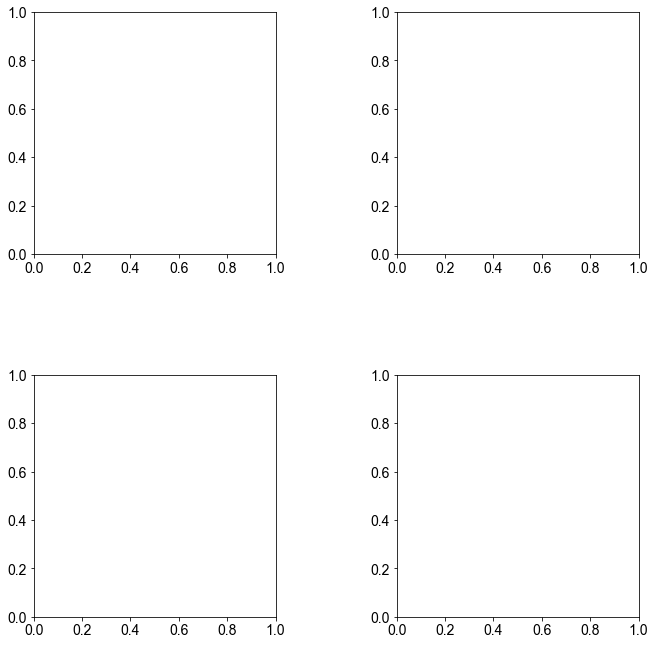

In [18]:
mpl.close('all')

fig8e_3 = mpl.figure(figsize=(12,12))

ax1 = fig8e_3.add_subplot(221)
ax2 = fig8e_3.add_subplot(222, sharex = ax1, sharey = ax1)
ax3 = fig8e_3.add_subplot(223)
ax4 = fig8e_3.add_subplot(224, sharex = ax3, sharey = ax3)
fig8e_3.subplots_adjust(left = 0.15, right = 0.85, bottom = 0.15, top = 0.85, wspace = 0.5, hspace= 0.5)

target_units = unit_key_df_onsets.loc[:,['tac_LL', 'tac_LR']].dropna()
target_units2 = unit_key_df_onsets.loc[:,['vis_LL', 'vis_LR']].dropna()

avg_onset_tLR, sem_onset_tLR = target_units['tac_LR'].mean(), target_units['tac_LR'].sem()
avg_onset_tLL, sem_onset_tLL = target_units['tac_LL'].mean(), target_units['tac_LL'].sem()
avg_onset_vLR, sem_onset_vLR = target_units2['vis_LR'].mean(), target_units2['vis_LR'].sem()
avg_onset_vLL, sem_onset_vLL = target_units2['vis_LL'].mean(), target_units2['vis_LL'].sem()

p_onset_touch = str(np.around(scipy.stats.ttest_rel(target_units['tac_LR'],
                                   target_units['tac_LL'])[1],decimals = 2))
p_onset_vis = str(np.around(scipy.stats.ttest_rel(target_units2['vis_LR'],
                                   target_units2['vis_LL'])[1],decimals = 2))

ax1.scatter(target_units['tac_LL'], target_units['tac_LR'], alpha = 0.7)
ax1.scatter(avg_onset_tLL, avg_onset_tLR, color = 'r')
ax1.plot([avg_onset_tLL, avg_onset_tLL],  [avg_onset_tLR -sem_onset_tLR ,avg_onset_tLR+sem_onset_tLR], 'r')
ax1.plot([avg_onset_tLL -sem_onset_tLL ,avg_onset_tLL+sem_onset_tLL], [avg_onset_tLR, avg_onset_tLR], 'r')
ax1.text(.05, .85, "p = " + p_onset_touch,transform=ax1.transAxes)

ax2.scatter(target_units2['vis_LL'], target_units2['vis_LR'], alpha = 0.7, color = 'C1')
ax2.scatter(avg_onset_vLL, avg_onset_vLR, color = 'r')
ax2.plot([avg_onset_vLL, avg_onset_vLL],  [avg_onset_vLR -sem_onset_vLR ,avg_onset_vLR+sem_onset_vLR], 'r')
ax2.plot([avg_onset_vLL -sem_onset_vLL ,avg_onset_vLL+sem_onset_vLL], [avg_onset_vLR, avg_onset_vLR], 'r')
ax2.text(.05, .85, "p = " + p_onset_vis,transform=ax2.transAxes)


tac_LR_smooth_aucs = tactile_LR_aucs.apply(lambda y: np.convolve(abs(y-.5)+.5, [1/3]*3, 'same'), axis = 1)
tac_LL_smooth_aucs = tactile_LL_aucs.apply(lambda y: np.convolve(abs(y-.5)+.5, [1/3]*3, 'same'), axis = 1)
vis_LR_smooth_aucs = visual_LR_aucs.apply(lambda y: np.convolve(abs(y-.5)+.5, [1/3]*3, 'same'), axis = 1)
vis_LL_smooth_aucs = visual_LL_aucs.apply(lambda y: np.convolve(abs(y-.5)+.5, [1/3]*3, 'same'), axis = 1)

max_tLR = tac_LR_smooth_aucs.loc[target_units.index, 40: 70].max(axis=1)
max_tLL = tac_LL_smooth_aucs.loc[target_units.index, 40: 70].max(axis=1)
max_vLR = vis_LR_smooth_aucs.loc[target_units2.index, 40: 70].max(axis=1)
max_vLL = vis_LL_smooth_aucs.loc[target_units2.index, 40: 70].max(axis=1)

avg_max_tLR, sem_max_tLR = max_tLR.mean(),max_tLR.sem()
avg_max_tLL, sem_max_tLL = max_tLL.mean(),max_tLL.sem()
avg_max_vLR, sem_max_vLR = max_vLR.mean(),max_vLR.sem()
avg_max_vLL, sem_max_vLL = max_vLL.mean(),max_vLL.sem()

p_max_touch = str(np.around(scipy.stats.ttest_rel(max_tLR,max_tLL)[1],decimals = 2))
p_max_vis = str(np.around(scipy.stats.ttest_rel(max_vLR, max_vLL)[1],decimals = 2))


ax3.scatter(max_tLL, max_tLR, alpha = 0.7)
ax3.scatter(avg_max_tLL, avg_max_tLR, color = 'r')
ax3.plot([avg_max_tLL, avg_max_tLL],[avg_max_tLR-sem_max_tLR, avg_max_tLR+sem_max_tLR], color = 'r')
ax3.plot([avg_max_tLL-sem_max_tLL, avg_max_tLL+sem_max_tLL], [avg_max_tLR, avg_max_tLR], color = 'r')
ax3.text(.05, .85, "p = " + p_max_touch,transform=ax3.transAxes, color = 'r')


ax4.scatter(max_vLL, max_vLR, alpha = 0.7, color = 'C1')
ax4.scatter(avg_max_vLL, avg_max_vLR, color = 'r')
ax4.plot([avg_max_vLL, avg_max_vLL],[avg_max_vLR-sem_max_vLR, avg_max_vLR+sem_max_vLR], color = 'r')
ax4.plot([avg_max_vLL-sem_max_vLL, avg_max_vLL+sem_max_vLL], [avg_max_vLR, avg_max_vLR], color = 'r')
ax4.text(.05, .85, "p = " + p_max_vis,transform=ax4.transAxes)

for i, ax in enumerate([ax1,ax2,ax3,ax4]):
    

    ax.set_xticks(ax.get_yticks())
    if ax.get_ylim()[1] > ax.get_xlim()[1]:
        lim = ax.get_ylim()
        ax.plot(lim, lim, '--k')
        ax.set_xlim(lim), ax.set_xlim(lim) 
    else:
        lim = ax.get_xlim()
        ax.plot(lim, lim, '--k')
        ax.set_ylim(lim), ax.set_xlim(lim)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    if i in [0,1]:
        mpl.sca(ax)
        mpl.xticks(np.arange(-0.25, 1.5, 0.5), np.arange(-0.25, 1.5, 0.5))
        mpl.yticks(np.arange(-0.25, 1.5, 0.5), np.arange(-0.25, 1.5, 0.5))

ax1.set_ylabel('Onset of late activity\n touch lick right trials (s)')
ax1.set_xlabel('Onset of late activity\n touch lick left trials (s)')

ax2.set_ylabel('Onset of late activity\n visual lick right trials (s)')
ax2.set_xlabel('Onset of late activity\n visual lick left trials (s)')

ax3.set_ylabel('Peak CP\n touch lick right trials')
ax3.set_xlabel('Peak CP\n touch lick left trials')

ax4.set_ylabel('Peak CP\n visual lick right trials')
ax4.set_xlabel('Peak CP\n visual lick left trials')
fig8e_3

In [ ]:
fig8e_3.savefig('fig8e_3.pdf', format='pdf', dpi=900)


## Multivariate linear regression (including no lick trials)

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def multi_regress(target_unit, y, factors,  formula, categorical = [], exclude_nl = False):
    
    all_variables = factors+y
    categoricals = np.array(factors)[categorical]

    unit_rows = log_df.merge(target_unit, on=['mouse_name', 'date', 'cluster_name'], how = 'inner')
    
    if exclude_nl:
        unit_rows = unit_rows[unit_rows['response'] != 0]
    
    test_unit_factors = unit_rows.loc[:,all_variables]

    if 'trial_type' in test_unit_factors:
        test_unit_factors['trial_type'] = test_unit_factors['trial_type'].str.contains('Stim_Som')*1
    
    for cat in categoricals:
        test_unit_factors[cat] = pd.Categorical(test_unit_factors[cat])
    
    for t in range(0,155,1):
        test_unit_factors['FR_t'+str(t)] = test_unit_factors[y[0]].apply(lambda x: np.mean(x[t:t+5]))

    test_unit_factors = sm.add_constant(test_unit_factors)

    coef = pd.DataFrame()
    pVals = pd.DataFrame()
    tVals = pd.DataFrame()
    models = []
    for t in range(155):
        model = smf.ols(formula = 'FR_t'+str(t)+formula, data = test_unit_factors).fit()
        coef['t_'+str(t)] = model.params
        pVals['t_'+str(t)] = model.pvalues
        tVals['t_'+str(t)] = model.tvalues
#         from IPython.core.debugger import Tracer; Tracer()()

        models.append(model)
        
    return coef, pVals, tVals, models

C:\Users\efink\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [20]:
mpl.close('all')

target_units = unit_key_df_onsets.sort_values('m_resp_auc').loc[p_sigs, :]
unit = target_units.index[78]
unit_df = pd.DataFrame(target_units.loc[unit]).T

unit_rows = log_df.merge(unit_df, on=['mouse_name', 'date', 'cluster_name'], how = 'inner')

t_NL = unit_rows.loc[unit_rows['trial_type'].str.contains('Som') & (unit_rows['response'] ==0),:]
t_LR = unit_rows.loc[unit_rows['trial_type'].str.contains('Som') & (unit_rows['response'] ==1),:]
t_LL = unit_rows.loc[unit_rows['trial_type'].str.contains('Som') & (unit_rows['response'] ==2),:]
v_NL = unit_rows.loc[unit_rows['trial_type'].str.contains('Vis') & (unit_rows['response'] ==0),:]
v_LR = unit_rows.loc[unit_rows['trial_type'].str.contains('Vis') & (unit_rows['response'] ==1),:]
v_LL = unit_rows.loc[unit_rows['trial_type'].str.contains('Vis') & (unit_rows['response'] ==2),:]

tt = [t_NL, t_LR, t_LL, v_NL, v_LR, v_LL]

fig8e_1 = mpl.figure(figsize = (16,16))

gs1 = gridspec.GridSpec(1,1)
gs2 = gridspec.GridSpec(1,1)
gs3 = gridspec.GridSpec(5,1)

gs1.update(bottom=0.5, top=0.95, left = 0.2, right = 0.86)
gs2.update(bottom=0.5, top=0.95, left = 0.87, right = 0.9)
gs3.update(bottom=0.15, top=0.47, left = 0.2, right = 0.86)

titles = ['β$1$: touch stimulus', 'β$2$: lick right','β$3$: lick left',
          'β$4$: touch stimulus x lick right','β$5$: touch stimulus x lick left']


ax = mpl.subplot(gs1[0, 0])
patch_ax = mpl.subplot(gs2[0, 0], sharey = ax)

colors = [ 'k','C0','#08306b', 'C7', '#cc4c02', 'C1',  ]

trial_type = 0
trial_total = 0
hists = []
for i in range(len(tt)):

    ras = tt[trial_type]
    spike_counts = []
    for trial, spike in enumerate(ras['spike_times(stim_aligned)']):
        spike = spike[(spike>-1) & (spike<=3)]
        ax.vlines(spike, trial + trial_total + .5, trial + trial_total + 1.5)
        

        spike = spike[(spike>window[0]) & (spike<=window[1])]
        edges = np.arange(window[0], window[1]+bin_size*2, bin_size)
        count, _ = np.histogram(spike,edges)
        spike_counts.append(count)

    c1 = 0.5
    c2 = 0

    hists.append(np.array(spike_counts))
    patch_ax.add_patch(patches.Rectangle((0,trial_total+c1), 1,
                                   trial + c2, facecolor = colors[trial_type], alpha = 0.7))
    trial_total += trial
    trial_type += 1

ax.get_xaxis().set_visible(False)
ax.set_xlim(-1,3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_ylabel('trial')


patch_ax.set_xlim(0,1)
patch_ax.axis('off')

#######################################
target_units = unit_key_df_onsets.sort_values('m_resp_auc').loc[p_sigs, :]

unit_df = pd.DataFrame(target_units.loc[unit]).T
form = '~ C(trial_type) + C(resp1) + C(resp2) + C(trial_type):C(resp1) + C(trial_type):C(resp2)'
coef, pVals, tVals, models = multi_regress(unit_df, ['spike_counts(stim_aligned)'], factors = ['trial_type', 'resp1', 'resp2'],
                                           categorical = [0,1,2], formula = form)
coef = coef.iloc[1:,:]
pVals = pVals.iloc[1:,:]
pos_sig_pVals = (pVals<0.05) & (coef>0)
neg_sig_pVals = (pVals<0.05) & (coef<0)

xvals = np.arange(0+.1,coef.shape[1]*0.025+.1, 0.025)-1

for c in range(coef.shape[0]):
    
    ax1 = mpl.subplot(gs3[c,0])
    ax1.plot(xvals, coef.iloc[c,:].as_matrix(), 'k')
    ax1.plot(xvals, [0] * len(xvals), 'C7--')
    ax1.plot(xvals[pos_sig_pVals.iloc[c,:].as_matrix()], [0]*sum(pos_sig_pVals.iloc[c,:].as_matrix()*1), 'sC2', alpha = 0.5)
    ax1.plot(xvals[neg_sig_pVals.iloc[c,:].as_matrix()], [0]*sum(neg_sig_pVals.iloc[c,:].as_matrix()*1), 'sC3', alpha = 0.5)

    ax1.text(.6, .65, titles[c] , size=20, transform=ax1.transAxes, color = 'k')

    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.set_xlabel('time from stim onset (s)')
    ax1.set_xlim(-1, 3)
    ax1.set_ylim(-20,50)


    if c != coef.shape[0]-1:
        ax1.spines['bottom'].set_visible(False)
        ax1.get_xaxis().set_visible(False)

fig8e_1

NameError: name 'unit_key_df_onsets' is not defined

In [ ]:
fig8e_1.savefig('fig8e_1.pdf', format='pdf', dpi=900)


In [ ]:
import itertools

target_units = unit_key_df_onsets.sort_values('m_resp_auc').loc[p_sigs, :]
unit = target_units.index[69]
unit_df = pd.DataFrame(target_units.loc[unit]).T

unit_rows = log_df.merge(unit_df, on=['mouse_name', 'date', 'cluster_name'], how = 'inner')


beta_dict = {'b1':'C(trial_type)', 'b2':'C(resp1)','b3':'C(resp2)','b4':'C(trial_type):C(resp1)','b5':'C(trial_type):C(resp2)'}
##### with touch+resp1+resp2+ touch x resp1 + touch x resp+2
form = '~ C(trial_type) * C(resp1) + C(resp2) + C(trial_type):C(resp2) + C(trial_type):C(resp2)'
coef, pVals, tVals, models = multi_regress(unit_df, ['spike_counts(stim_aligned)'], factors = ['trial_type', 'resp1', 'resp2'],
                                           categorical = [0,1,2], formula = form)

factors = ['b1', 'b2', 'b3', 'b4', 'b5']
all_subsets = []
for L in range(0, len(factors)+1):
    for subset in itertools.combinations(factors, L):
        all_subsets.append(subset)
forms = []
for sub in all_subsets[1:]:
    forms.append("+".join([beta_dict[i] for i in sub]))
    
forms_df = pd.DataFrame(forms, columns = ['formulas'])

all_comparison_subsets = pd.concat((forms_df,pd.DataFrame(all_subsets[1:],columns = np.arange(1,len(factors)+1))), axis = 1)

col_names= ['t_'+str(i) for i in range(155)]
# for col in col_names:
#     all_comparison_subsets[col] = 
    
all_models = all_comparison_subsets.loc[:,'formulas'].apply(
            lambda x: multi_regress(unit_df, ['spike_counts(stim_aligned)'],
            factors = ['trial_type', 'resp1', 'resp2'],
            categorical = [0,1,2], formula = '~' + x)[-1])

levels = all_comparison_subsets.iloc[:,1:].apply(lambda y: ~pd.isnull(y)*1, axis = 0).sum(axis=1)
all_rs = pd.DataFrame(all_models.as_matrix().flatten().tolist(), columns = col_names).applymap(lambda y: y.rsquared)
r_table = pd.concat((all_comparison_subsets,pd.DataFrame(levels, columns = ['level']), all_rs), axis = 1)

In [ ]:
r_table.head()

In [ ]:
all_dom_scores = pd.concat((pd.DataFrame({'added_beta' : factors, 'simpler_model': [[]]*5}), 
                            r_table[r_table['level'] == 1].iloc[:,7:]), axis = 1)
for lev in range(1,r_table['level'].iloc[-1]):

    for row_num in range(r_table[r_table['level'] == lev].shape[0]):
        row = r_table[r_table['level'] == lev].iloc[row_num]
        simpler_mod = row[1:6].dropna()

        complex_mod_rows = r_table[r_table['level'] == lev+1]
        complex_mods = complex_mod_rows.iloc[:, 1:6].dropna(axis = 1)

        next_lev_mod_rows = complex_mod_rows[(complex_mods.isin(simpler_mod.as_matrix())*1).sum(axis = 1) ==lev]
        next_lev_mods = next_lev_mod_rows.iloc[:, 1:6].dropna(axis = 1).reset_index(drop = True)
        added_beta = pd.DataFrame(next_lev_mods.as_matrix()[~next_lev_mods.isin(simpler_mod.as_matrix()).as_matrix()], 
                                  columns = ['added_beta'])
        
        dom_scores = pd.DataFrame({'simpler_model': [list(simpler_mod.as_matrix())]*len(added_beta),
                                  'added_beta': next_lev_mods.as_matrix()[~next_lev_mods.isin(simpler_mod.as_matrix()).as_matrix()]})
        dom_scores = pd.concat((dom_scores, (next_lev_mod_rows.iloc[:,7:] - row[7:]).reset_index(drop = True)), axis = 1)
        all_dom_scores = pd.concat((all_dom_scores, dom_scores), axis = 0).reset_index(drop = True)
        
fig = mpl.figure(figsize = (16,5))
ax = fig.add_subplot(111)
y = all_dom_scores[all_dom_scores['added_beta'] == 'b1'].iloc[:, 2:].mean(axis=0)
y2 = all_dom_scores[all_dom_scores['added_beta'] == 'b2'].iloc[:, 2:].mean(axis=0)
y3 = all_dom_scores[all_dom_scores['added_beta'] == 'b3'].iloc[:, 2:].mean(axis=0)
y4 = all_dom_scores[all_dom_scores['added_beta'] == 'b4'].iloc[:, 2:].mean(axis=0)
y5 = all_dom_scores[all_dom_scores['added_beta'] == 'b5'].iloc[:, 2:].mean(axis=0)
y6 = y+y2
y7 = y4-(y+y2)

ax.plot(np.arange(0,155), y)
ax.plot(np.arange(0,155), y2)
# ax.plot(np.arange(0,155), y3)
ax.plot(np.arange(0,155), y4)
# ax.plot(np.arange(0,155), y5)
# ax.plot(np.arange(0,155), y6)
ax.plot(np.arange(0,155), y7)

fig

In [ ]:
target_units = unit_key_df_onsets.sort_values('m_resp_auc')

row_names = ['t_'+str(t) for t in range(155)]
all_trial_type_coef = []
all_resp1_coef = []
all_resp2_coef = []
all_txResp1_coef = []
all_txResp2_coef = []

all_trial_type_pval = []
all_resp1_pval = []
all_resp2_pval =[]
all_txResp1_pval =[]
all_txResp2_pval = []

for unit_num in range(target_units.shape[0]):
    unit = target_units.index[unit_num]
    unit_df = pd.DataFrame(target_units.loc[unit]).T
    form = '~ C(trial_type) + C(resp1) + C(resp2) + C(trial_type):C(resp1) + C(trial_type):C(resp2)'
    coef, pVals, tvals, models = multi_regress(unit_df, ['spike_counts(stim_aligned)'], 
                                               factors = ['trial_type', 'resp1', 'resp2'],
                                               categorical = [0,1,2], formula = form)
    all_trial_type_coef.append(coef.iloc[1,:])
    all_resp1_coef.append(coef.iloc[2,:])
    all_resp2_coef.append(coef.iloc[3,:]),
    all_txResp1_coef.append(coef.iloc[4,:])
    all_txResp2_coef.append(coef.iloc[5,:])
    
    all_trial_type_pval.append(pVals.iloc[1,:])
    all_resp1_pval.append(pVals.iloc[2,:])
    all_resp2_pval.append(pVals.iloc[3,:])
    all_txResp1_pval.append(pVals.iloc[4,:])
    all_txResp2_pval.append(pVals.iloc[5,:])

all_trial_type_coef = pd.concat(all_trial_type_coef, axis = 1).T.set_index(target_units.index)
all_resp1_coef = pd.concat(all_resp1_coef, axis = 1).T.set_index(target_units.index)
all_resp2_coef = pd.concat(all_resp2_coef, axis = 1).T.set_index(target_units.index)
all_txResp1_coef = pd.concat(all_txResp1_coef, axis = 1).T.set_index(target_units.index)
all_txResp2_coef = pd.concat(all_txResp2_coef, axis = 1).T.set_index(target_units.index)

all_trial_type_pval = pd.concat(all_trial_type_pval, axis = 1).T.set_index(target_units.index)
all_resp1_pval = pd.concat(all_resp1_pval, axis = 1).T.set_index(target_units.index)
all_resp2_pval = pd.concat(all_resp2_pval, axis = 1).T.set_index(target_units.index)
all_txResp1_pval = pd.concat(all_txResp1_pval, axis = 1).T.set_index(target_units.index)
all_txResp2_pval = pd.concat(all_txResp2_pval, axis = 1).T.set_index(target_units.index)

In [ ]:
(sig_pos_coef).sum(axis = 0).shape

In [ ]:
mpl.close('all')
fig8e_2 = mpl.figure(figsize = (16,10))

pvals = [all_trial_type_pval, all_resp1_pval,all_resp2_pval,all_txResp1_pval,all_txResp2_pval]
coefs = [all_trial_type_coef, all_resp1_coef,all_resp2_coef,all_txResp1_coef,all_txResp2_coef]
titles = ['β$1$: touch stimulus', 'β$2$: lick right','β$3$: lick left',
          'β$4$: touch stimulus x lick right','β$5$: touch stimulus x lick left']
xvals = np.arange(0+.1,coef.shape[1]*0.025+.1, 0.025)-1

for i in range(len(pvals)):
    ax = fig8e_2.add_subplot(5,1,i+1)
    p_coefs = coefs[i]>0
    sig_pos_coef =  (pvals[i] < 0.05) & (coefs[i] > 0)
    sig_neg_coef =  (pvals[i] < 0.05) & (coefs[i] < 0)

    ax.bar(xvals, (sig_pos_coef).sum(axis = 0).as_matrix(), color = 'C2', width = 0.025, alpha = 0.5)
    ax.bar(xvals, (sig_neg_coef).sum(axis = 0), color = 'r', width = 0.025, alpha = 0.5)
    ax.set_ylim(-10, 50)
    ax.set_xlim(-1,3)
    ax.text(.6, .8, titles[i] , size=20, transform=ax.transAxes, color = 'k')
    ax.set_ylabel('frequency')

    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel('time from stim onset (s)')
    if i != len(pvals)-1:
        ax.spines['bottom'].set_visible(False)
        ax.get_xaxis().set_visible(False)

fig8e_2

In [ ]:
fig8e_2.savefig('fig8e_2.pdf', format='pdf', dpi=900)


## Multivariate linear regression (without no lick trials)

In [ ]:
mpl.close('all')

target_units = unit_key_df_onsets.sort_values('m_resp_auc').loc[p_sigs, :]
unit = target_units.index[69]
unit_df = pd.DataFrame(target_units.loc[unit]).T

unit_rows = log_df.merge(unit_df, on=['mouse_name', 'date', 'cluster_name'], how = 'inner')

t_LR = unit_rows.loc[unit_rows['trial_type'].str.contains('Som') & (unit_rows['response'] ==1),:]
t_LL = unit_rows.loc[unit_rows['trial_type'].str.contains('Som') & (unit_rows['response'] ==2),:]
v_LR = unit_rows.loc[unit_rows['trial_type'].str.contains('Vis') & (unit_rows['response'] ==1),:]
v_LL = unit_rows.loc[unit_rows['trial_type'].str.contains('Vis') & (unit_rows['response'] ==2),:]

tt = [t_LR, t_LL, v_LR, v_LL]

fig8e_1 = mpl.figure(figsize = (16,16))

gs1 = gridspec.GridSpec(1,1)
gs2 = gridspec.GridSpec(1,1)
gs3 = gridspec.GridSpec(5,1)

gs1.update(bottom=0.5, top=0.95, left = 0.2, right = 0.86)
gs2.update(bottom=0.5, top=0.95, left = 0.87, right = 0.9)
gs3.update(bottom=0.15, top=0.47, left = 0.2, right = 0.86)

titles = ['β$1$: touch stimulus', 'β$2$: lick right',
          'β$4$: touch stimulus x lick right']


ax = mpl.subplot(gs1[0, 0])
patch_ax = mpl.subplot(gs2[0, 0], sharey = ax)

colors = ['C0','#08306b', '#cc4c02', 'C1',  ]

trial_type = 0
trial_total = 0
hists = []
for i in range(len(tt)):

    ras = tt[trial_type]
    spike_counts = []
    for trial, spike in enumerate(ras['spike_times(stim_aligned)']):
        spike = spike[(spike>-1) & (spike<=3)]
        ax.vlines(spike, trial + trial_total + .5, trial + trial_total + 1.5)
        

        spike = spike[(spike>window[0]) & (spike<=window[1])]
        edges = np.arange(window[0], window[1]+bin_size*2, bin_size)
        count, _ = np.histogram(spike,edges)
        spike_counts.append(count)

    c1 = 0.5
    c2 = 0

    hists.append(np.array(spike_counts))
    patch_ax.add_patch(patches.Rectangle((0,trial_total+c1), 1,
                                   trial + c2, facecolor = colors[trial_type], alpha = 0.7))
    trial_total += trial
    trial_type += 1

ax.get_xaxis().set_visible(False)
ax.set_xlim(-1,3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_ylabel('trial')


patch_ax.set_xlim(0,1)
patch_ax.axis('off')

#######################################
target_units = unit_key_df_onsets.sort_values('m_resp_auc').loc[p_sigs, :]
unit = target_units.index[69]

unit_df = pd.DataFrame(target_units.loc[unit]).T
form = '~ C(trial_type) + C(resp1) + C(trial_type):C(resp1)'
coef, pVals, tVals, models = multi_regress(unit_df, ['spike_counts(stim_aligned)'], factors = ['trial_type', 'resp1'],
                                           categorical = [0,1], formula = form, exclude_nl = True)
coef = coef.iloc[1:,:]
pVals = pVals.iloc[1:,:]
pos_sig_pVals = (pVals<0.05) & (coef>0)
neg_sig_pVals = (pVals<0.05) & (coef<0)

xvals = np.arange(0+.1,coef.shape[1]*0.025+.1, 0.025)-1

for c in range(coef.shape[0]):
    
    ax1 = mpl.subplot(gs3[c,0])
    ax1.plot(xvals, coef.iloc[c,:].as_matrix(), 'k')
    ax1.plot(xvals, [0] * len(xvals), 'C7--')
    ax1.plot(xvals[pos_sig_pVals.iloc[c,:].as_matrix()], [0]*sum(pos_sig_pVals.iloc[c,:].as_matrix()*1), 'sC2', alpha = 0.5)
    ax1.plot(xvals[neg_sig_pVals.iloc[c,:].as_matrix()], [0]*sum(neg_sig_pVals.iloc[c,:].as_matrix()*1), 'sC3', alpha = 0.5)

    ax1.text(.6, .65, titles[c] , size=20, transform=ax1.transAxes, color = 'k')

    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.set_xlabel('time from stim onset (s)')
    ax1.set_xlim(-1, 3)
    ax1.set_ylim(-20,50)


    if c != coef.shape[0]-1:
        ax1.spines['bottom'].set_visible(False)
        ax1.get_xaxis().set_visible(False)

fig8e_1

In [ ]:
unit_df

In [ ]:
target_units = unit_key_df_onsets.sort_values('m_resp_auc')

row_names = ['t_'+str(t) for t in range(155)]
all_trial_type_coef = []
all_resp1_coef = []
all_resp2_coef = []
all_txResp1_coef = []
all_txResp2_coef = []

all_trial_type_pval = []
all_resp1_pval = []
all_resp2_pval =[]
all_txResp1_pval =[]
all_txResp2_pval = []

for unit_num in range(target_units.shape[0]):
    unit = target_units.index[unit_num]
    unit_df = pd.DataFrame(target_units.loc[unit]).T
    form = '~ C(trial_type) + C(resp1) + C(trial_type):C(resp1)'
    coef, pVals, tvals, models = multi_regress(unit_df, ['spike_counts(stim_aligned)'], 
                                               factors = ['trial_type', 'resp1'],
                                               categorical = [0,1], formula = form, exclude_nl = True)
    all_trial_type_coef.append(coef.iloc[1,:])
    all_resp1_coef.append(coef.iloc[2,:])
#     all_resp2_coef.append(coef.iloc[3,:]),
    all_txResp1_coef.append(coef.iloc[3,:])
#     all_txResp2_coef.append(coef.iloc[5,:])
    
    all_trial_type_pval.append(pVals.iloc[1,:])
    all_resp1_pval.append(pVals.iloc[2,:])
#     all_resp2_pval.append(pVals.iloc[3,:])
    all_txResp1_pval.append(pVals.iloc[3,:])
#     all_txResp2_pval.append(pVals.iloc[5,:])

all_trial_type_coef = pd.concat(all_trial_type_coef, axis = 1).T.set_index(target_units.index)
all_resp1_coef = pd.concat(all_resp1_coef, axis = 1).T.set_index(target_units.index)
# all_resp2_coef = pd.concat(all_resp2_coef, axis = 1).T.set_index(target_units.index)
all_txResp1_coef = pd.concat(all_txResp1_coef, axis = 1).T.set_index(target_units.index)
# all_txResp2_coef = pd.concat(all_txResp2_coef, axis = 1).T.set_index(target_units.index)

all_trial_type_pval = pd.concat(all_trial_type_pval, axis = 1).T.set_index(target_units.index)
all_resp1_pval = pd.concat(all_resp1_pval, axis = 1).T.set_index(target_units.index)
# all_resp2_pval = pd.concat(all_resp2_pval, axis = 1).T.set_index(target_units.index)
all_txResp1_pval = pd.concat(all_txResp1_pval, axis = 1).T.set_index(target_units.index)
# all_txResp2_pval = pd.concat(all_txResp2_pval, axis = 1).T.set_index(target_units.index)

In [ ]:
coef

In [ ]:
mpl.close('all')
fig8e_2 = mpl.figure(figsize = (16,10))

pvals = [all_trial_type_pval, all_resp1_pval,all_txResp1_pval]
coefs = [all_trial_type_coef, all_resp1_coef,all_txResp1_coef]
titles = ['β$1$: touch stimulus', 'β$2$: lick right',
          'β$4$: touch stimulus x lick right']
for i in range(len(pvals)):
    ax = fig8e_2.add_subplot(5,1,i+1)
    p_coefs = coefs[i]>0
    sig_pos_coef =  (pvals[i] < 0.05) & (coefs[i] > 0)
    sig_neg_coef =  (pvals[i] < 0.05) & (coefs[i] < 0)

    ax.bar(xvals, (sig_pos_coef).sum(axis = 0), color = 'C2', width = 0.02, alpha = 0.5)
    ax.bar(xvals, (sig_neg_coef).sum(axis = 0), color = 'r', width = 0.02, alpha = 0.5)
    ax.set_ylim(-10, 50)
    ax.set_xlim(-1,3)
    ax.text(.6, .8, titles[i] , size=20, transform=ax.transAxes, color = 'k')
    ax.set_ylabel('frequency')

    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel('time from stim onset (s)')
    if i != len(pvals)-1:
        ax.spines['bottom'].set_visible(False)
        ax.get_xaxis().set_visible(False)

fig8e_2

In [ ]:
coefs[i]